# Exploratory Data Analysis (EDA)

## 1. **Load the Dataset:** Start by loading the train.csv dataset into a pandas DataFrame.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training dataset
df = pd.read_csv('/kaggle/input/smt-dataset/train.csv')

df.head()

,id,feedback_text,toxic,abusive,vulgar,menace,offense,bigotry
0,281d77b7bebc2201,:::Sounds good. Let me know when you're done ...,0,0,0,0,0,0
1,716aac7bf3c63db1,"""\nI say something, but it didn't actually con...",0,0,0,0,0,0
2,57cb318c6edcf10c,"""Agustina Barrientos]] \n | Modelo de Piñeiro ...",0,0,0,0,0,0
3,dc3bd70118d91b3a,FYI I enjoy licking strangers scrotal sacks......,1,0,1,0,0,0
4,cf10d41f2997d233,How do you get a site?\nMany penguins have ask...,0,0,0,0,0,0


### Loading validation and test data

In [2]:
validation = pd.read_csv('/kaggle/input/smt-dataset/validation.csv')
test = pd.read_csv('/kaggle/input/smt-dataset/test.csv')

### Lets work with validation and test data

In [3]:
!pip install langdetect
!pip install deep_translator

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 20.4 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=878f50c6a94caded54f3cccf9c25aaf53dd11fd56ebf34f75a7b7f0314f944dd
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.1 MB/s eta 0:00:00


In [4]:
from langdetect import detect

test['language'] = test['content'].apply(lambda x: detect(x))
validation['language'] = validation['feedback_text'].apply(lambda x: detect(x))

In [ ]:
test.head()

In [5]:
print("------")
validation.head()

------


,id,feedback_text,lang,toxic,language
0,1203,İyi tamam olabilir. Balkanlar maddesini gelişt...,tr,0,tr
1,5871,"Por dios, y la canción de John Lennon: http://...",es,1,es
2,3590,Selam. Öncelikle tebrik ederim... Bu arada ken...,tr,0,tr
3,447,Leggiti tutte le discussioni. Magari cancellal...,it,1,it
4,6634,A LAS TOKITAS NOS VALE QUE LAS JONATICAS INSUL...,es,1,en


In [6]:
from deep_translator import GoogleTranslator
from multiprocessing.dummy import Pool as ThreadPool
import pandas as pd

def translate_to_english(text):
    try:
        return GoogleTranslator(source='auto', target='en').translate(text)
    except:
        return text

# Function to translate a list of texts in parallel
def batch_translate(text_list, num_threads=16):
    with ThreadPool(num_threads) as pool:
        results = pool.map(translate_to_english, text_list)
    return results

# Translate test and validation content
test['en_text'] = batch_translate(test['content'].tolist())
validation['en_text'] = batch_translate(validation['feedback_text'].tolist())



## 2. **Visualize Label Distribution:** Understand the distribution of the labels (toxic, abusive, vulgar, menace, offense, bigotry).

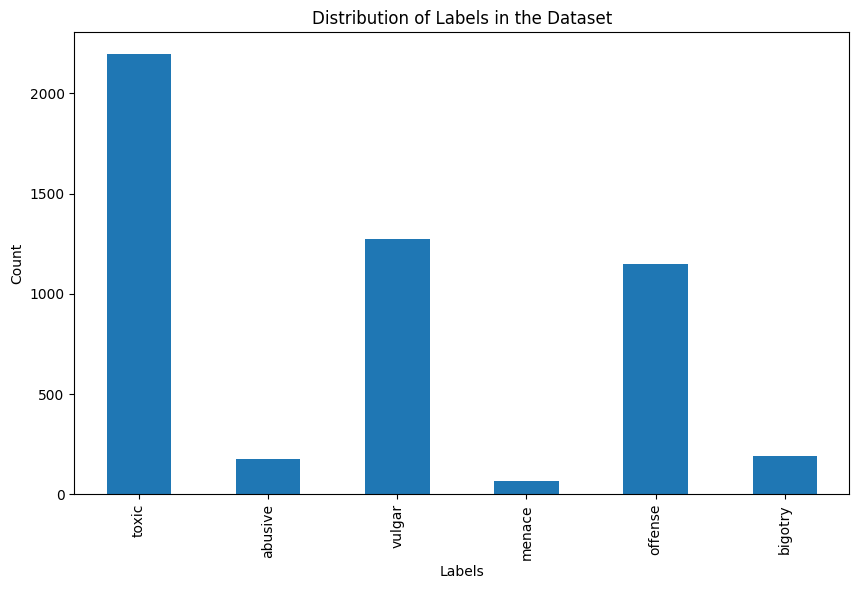

In [7]:
labels = ['toxic','abusive','vulgar','menace','offense','bigotry']
df[labels].sum().plot(kind='bar',figsize=(10,6))
plt.title('Distribution of Labels in the Dataset')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

## 3.**Analyze Sentence Structure:**

 - Calculate the average sentence length (number of words).

 - Plot the distribution of comment lengths.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


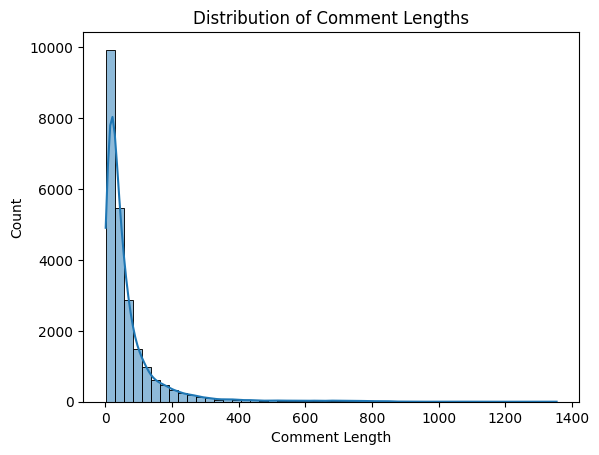

In [8]:
df['text_length'] = df['feedback_text'].apply(lambda x: len(x.split()))

# plot distribution of text length
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Distribution of Comment Lengths')
plt.xlabel('Comment Length')
plt.ylabel('Count')
plt.show()

## 4. **Check for Missing Values:**

In [9]:
print(df.isnull().sum())

id               0
feedback_text    0
toxic            0
abusive          0
vulgar           0
menace           0
offense          0
bigotry          0
text_length      0
dtype: int64


## 5. **Check for Outliers:** You can use boxplots to identify potential outliers in numeric columns (e.g., text_length).

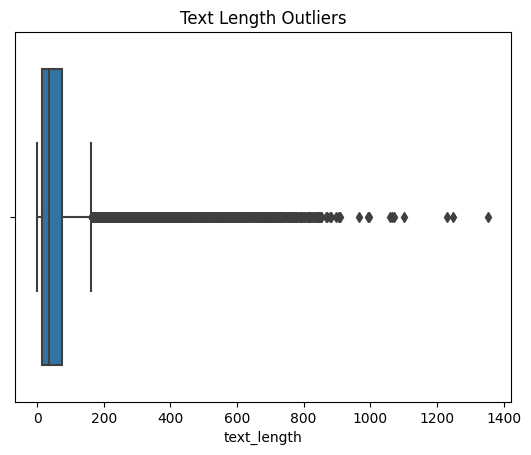

In [10]:
sns.boxplot(x=df['text_length'])
plt.title('Text Length Outliers')
plt.show()

# Text Preprocessing

## 1. **Tokenization:** Split the text into words using a tokenizer using nltk

In [11]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt_tab')

# Tokenize feedback text
df['tokens'] = df['feedback_text'].apply(word_tokenize)
print(df['tokens'])

[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


0        [:, :, :, Sounds, good, ., Let, me, know, when...
1        [``, I, say, something, ,, but, it, did, n't, ...
2        [``, Agustina, Barrientos, ], ], |, Modelo, de...
3        [FYI, I, enjoy, licking, strangers, scrotal, s...
4        [How, do, you, get, a, site, ?, Many, penguins...
                               ...                        
23468                    [yo, man, your, pissing, me, off]
23469                       [I, kid, you, not, ,, cunt, .]
23470    [I, think, 's, 22:53, ,, 30, January, 2006, su...
23471    [Script, Characters, Doogie-Russell, Spaghetti...
23472    [Whales, are, mammals, that, take, peoples, mo...
Name: tokens, Length: 23473, dtype: object


## 2. **Lowercasing:** Convert the text to lowercase.

In [12]:
df['feedback_text'] = df['feedback_text'].apply(lambda x: x.lower())
print(df['feedback_text'])

0        :::sounds good.  let me know when you're done ...
1        "\ni say something, but it didn't actually con...
2        "agustina barrientos]] \n | modelo de piñeiro ...
3        fyi i enjoy licking strangers scrotal sacks......
4        how do you get a site?\nmany penguins have ask...
                               ...                        
23468                           yo man your pissing me off
23469                                 i kid you not, cunt.
23470    i think 's 22:53, 30 january 2006 suggestion w...
23471    script \n\n  characters \n\n doogie-russell \n...
23472    whales are mammals that take peoples money and...
Name: feedback_text, Length: 23473, dtype: object


## 3. Remove Stop Words, Special Characters, and Punctuation:

In [13]:
from nltk.corpus import stopwords
import string

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
def clean_text(text):
  text = ''.join([char for char in text if char not in string.punctuation])
  text = ' '.join([word for word in text.split() if word not in stop_words])
  return text

df['cleaned_text'] = df['feedback_text'].apply(clean_text)
print(df['cleaned_text'])

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0             sounds good let know youre done ill start pr
1        say something didnt actually confirm anything ...
2        agustina barrientos modelo de piñeiro juán cru...
3        fyi enjoy licking strangers scrotal sacksespec...
4        get site many penguins asked question simple g...
                               ...                        
23468                                       yo man pissing
23469                                             kid cunt
23470    think 2253 30 january 2006 suggestion mark mol...
23471    script characters doogierussell spaghetti fart...
23472    whales mammals take peoples money spend mcdona...
Name: cleaned_text, Length: 23473, dtype: object


::## 4. **Stemming or Lemmatization:** Using nltk

In [14]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

# Apply stemming
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))
print(df['cleaned_text'])

0               sound good let know your done ill start pr
1        say someth didnt actual confirm anyth put arti...
2        agustina barriento modelo de piñeiro juán cruz...
3        fyi enjoy lick stranger scrotal sacksespeci ha...
4        get site mani penguin ask question simpl go ww...
                               ...                        
23468                                          yo man piss
23469                                             kid cunt
23470    think 2253 30 januari 2006 suggest mark moldov...
23471    script charact doogierussel spaghetti fartscol...
23472    whale mammal take peopl money spend mcdonadl f...
Name: cleaned_text, Length: 23473, dtype: object


## 5. **Feature Extraction:** Convert text into numeric representations.
 - Use TF-IDF, Word2Vec, or Transformer embeddings.

 - Here's an example using TfidfVectorizer from sklearn.

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_text'])
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 543549 stored elements and shape (23473, 5000)>
  Coords	Values
  (0, 3339)	0.5467362595211996
  (0, 4126)	0.3015546471803148
  (0, 2208)	0.3080160897908338
  (0, 1409)	0.2982104112006761
  (0, 4937)	0.2942460236368662
  (0, 2491)	0.22867942295450963
  (0, 2575)	0.2930240850818252
  (0, 1955)	0.2555771530208949
  (0, 4056)	0.36916540991402597
  (1, 4523)	0.1256249397958633
  (1, 1216)	0.13341620751426714
  (1, 2946)	0.15653162590992417
  (1, 961)	0.12638960402130706
  (1, 1138)	0.19464647625491469
  (1, 4503)	0.14918724997793392
  (1, 4294)	0.14053014405959321
  (1, 4057)	0.20564629056403622
  (1, 4418)	0.10189966103337976
  (1, 2523)	0.13921217879197012
  (1, 4742)	0.14295848495440938
  (1, 3766)	0.2379993067638508
  (1, 1928)	0.1036101409119622
  (1, 646)	0.18254247768720458
  (1, 1946)	0.10435667358682765
  (1, 2807)	0.2224799151102893
  :	:
  (23471, 3486)	0.02730704815472507
  (23471, 3051)	0.031304298167526085
  (23471

# preprocess validation and testing data

In [16]:
# # Final assignments
# x_val = validation['en_text']
# y_val = validation['toxic']
# x_test = test['en_text']


## Tokenize validation and testing data

In [17]:
test['tokens'] = test['en_text'].apply(word_tokenize)
validation['tokens'] = validation['en_text'].apply(word_tokenize)

## Lower casing validation and testing data

In [18]:
test['en_text'] = test['en_text'].apply(lambda x: x.lower())
validation['en_text'] = validation['en_text'].apply(lambda x: x.lower())

## Remove Stop Words, Special Characters, and Punctuation:

In [19]:
test['cleaned_text'] = test['en_text'].apply(clean_text)
validation['cleaned_text'] = validation['en_text'].apply(clean_text)

## **Stemming or Lemmatization:** Using nltk

In [20]:
test['cleaned_text'] = test['cleaned_text'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))
validation['cleaned_text'] = validation['cleaned_text'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))

In [21]:
# Save the translated test DataFrame to a new CSV file
test.to_csv('translated_test.csv', index=False)

# Save the translated validation DataFrame to a new CSV file
validation.to_csv('translated_validation.csv', index=False)

## Feature extraction

In [22]:
Xt = vectorizer.fit_transform(test['cleaned_text'])
Xv  = vectorizer.fit_transform(validation['cleaned_text'])

# Model Creation


## 1. **Baseline Model**: Start with LSTM

---



Epoch 1/10
734/734 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9112 - loss: 0.2868 - val_accuracy: 0.8131 - val_loss: 0.6630
Epoch 2/10
734/734 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9599 - loss: 0.1134 - val_accuracy: 0.8274 - val_loss: 0.7287
Epoch 3/10
734/734 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9743 - loss: 0.0732 - val_accuracy: 0.8131 - val_loss: 0.9410
Epoch 4/10
734/734 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9853 - loss: 0.0467 - val_accuracy: 0.8060 - val_loss: 1.0134
Epoch 5/10
734/734 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9900 - loss: 0.0323 - val_accuracy: 0.8226 - val_loss: 1.1383
Epoch 6/10
734/734 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9936 - loss: 0.0234 - val_accuracy: 0.8095 - val_loss: 1.2157
Epoch 7/10
734/734 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9962 - loss: 0.0152 - val_accuracy: 0.8048 - val_loss: 1.3520
Epoch 8/10
734/734 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9952 - loss: 0.0145 - 

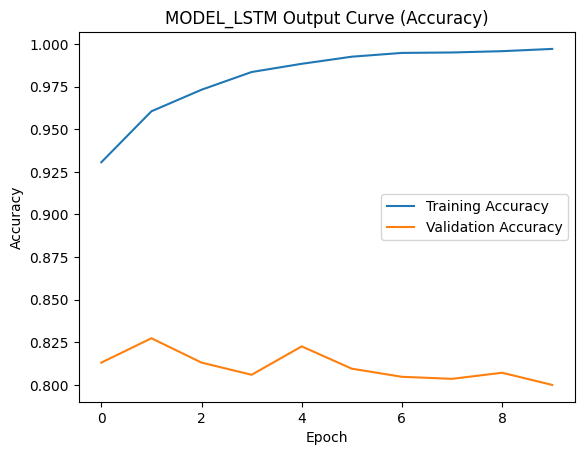

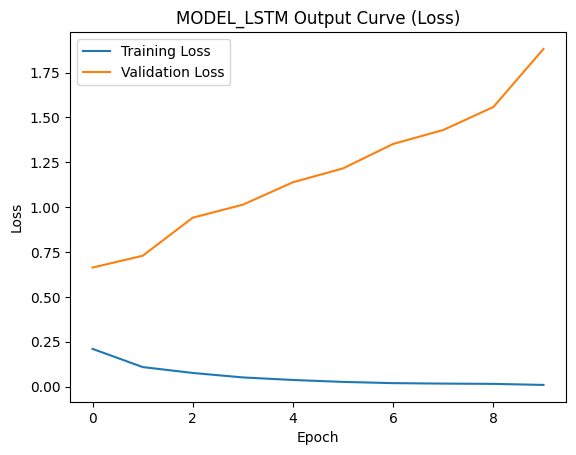

In [34]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense ,Dropout

# Tokenize and pad sequences
# x_train = df['cleaned_text']
y_train = df['toxic']
y_val = validation['toxic']
def sequence_text(text):
  tokenizer = Tokenizer(num_words=10000)
  tokenizer.fit_on_texts(text)
  X_seq = tokenizer.texts_to_sequences(text)
  X_pad = pad_sequences(X_seq,maxlen=200)

  return X_pad

x_train = sequence_text(df['cleaned_text'])
x_val = sequence_text(validation['cleaned_text'])
x_test = sequence_text(test['cleaned_text'])

model = Sequential([
    Embedding(10000,256),
    # LSTM(256,return_sequences=True), # Added return_sequences=True
    LSTM(128,return_sequences=True), # Added return_sequences=True
    LSTM(64),
    # Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(16,activation='relu'),
    # Dropout(0.2),
    Dense(1,activation='sigmoid')
])


model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("MODEL_LSTM Output Curve (Accuracy)")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("MODEL_LSTM Output Curve (Loss)")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Model Evaluation


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
Accuracy: 0.8
Precision: 0.18518518518518517
Recall: 0.07462686567164178
F1 Score: 0.10638297872340424
ROC AUC Score: 0.5010887488901103


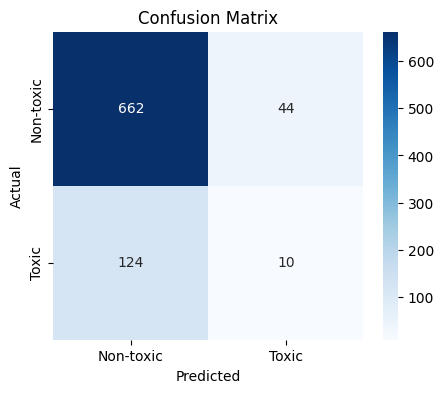

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(x_val)
# Threshold predicted probabilities
y_pred = np.array(y_pred).flatten()
y_pred_binary = (y_pred > 0.5).astype(int)

# Accuracy, Precision, Recall, F1
accuracy = accuracy_score(y_val, y_pred_binary)
precision = precision_score(y_val, y_pred_binary)
recall = recall_score(y_val, y_pred_binary)
f1 = f1_score(y_val, y_pred_binary)
roc_auc = roc_auc_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred_binary)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-toxic', 'Toxic'], yticklabels=['Non-toxic', 'Toxic'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Model Tuning and Optimization

Epoch 1/16
367/367 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - accuracy: 0.9014 - loss: 0.4298 - val_accuracy: 0.8405 - val_loss: 0.4776
Epoch 2/16
367/367 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9068 - loss: 0.2962 - val_accuracy: 0.8393 - val_loss: 0.5315
Epoch 3/16
367/367 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9336 - loss: 0.1793 - val_accuracy: 0.8333 - val_loss: 0.8213
Epoch 4/16
367/367 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9527 - loss: 0.1316 - val_accuracy: 0.8048 - val_loss: 0.8488
Epoch 5/16
367/367 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9647 - loss: 0.0985 - val_accuracy: 0.8298 - val_loss: 1.0717
Epoch 6/16
367/367 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9719 - loss: 0.0817 - val_accuracy: 0.8214 - val_loss: 1.1064
Epoch 7/16
367/367 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9772 - loss: 0.0683 - val_accuracy: 0.8226 - val_loss: 1.3287
Epoch 8/16
367/367 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9803 - loss: 0.0588 - 

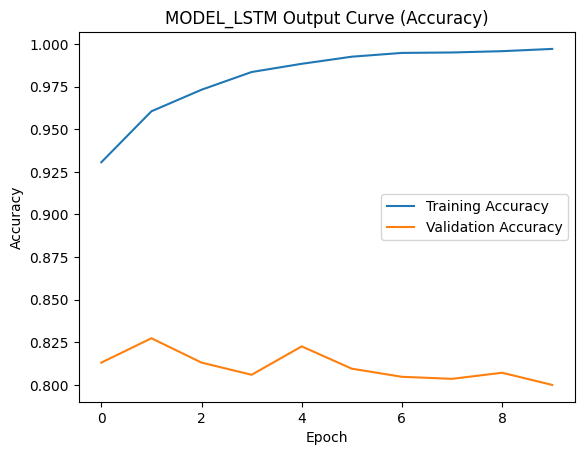

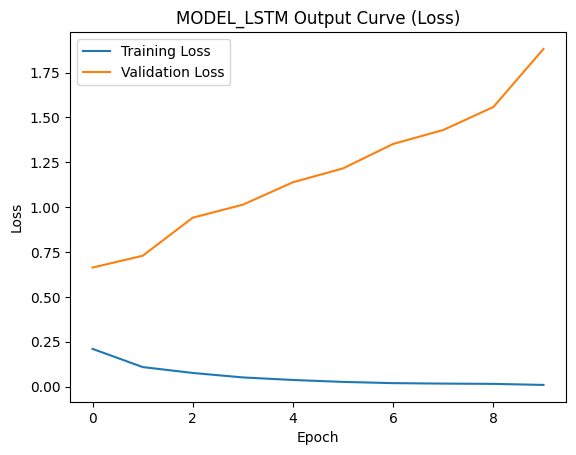

In [36]:
from tensorflow.keras.optimizers import Adam, SGD

def create_model(optimizer='adam', dropout_rate=0.2):
    model = Sequential([
        Embedding(10000, 256),
        LSTM(128, return_sequences=True),
        Dropout(dropout_rate),
        LSTM(64),
        Dense(32, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Try different learning rates
opt = Adam(learning_rate=1e-4) 
model = create_model(optimizer=opt, dropout_rate=0.4)
histoy = model.fit(x_train, y_train, epochs=16, batch_size=64, validation_data=(x_val, y_val))

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("MODEL_LSTM Output Curve (Accuracy)")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("MODEL_LSTM Output Curve (Loss)")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
!pip install keras_tuner

# 🧪 Optional: Grid Search with Keras Tun

In [38]:
import keras_tuner as kt

def build_model(hp):
    model = Sequential()
    model.add(Embedding(10000, hp.Int('embed_dim', 64, 256, step=64)))
    model.add(LSTM(hp.Int('lstm_units', 64, 256, step=64), return_sequences=True))
    model.add(Dropout(hp.Float('dropout', 0.2, 0.5, step=0.1)))
    model.add(LSTM(hp.Int('lstm_units2', 32, 128, step=32)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=Adam(hp.Choice('lr', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory='my_dir',
    project_name='toxic_lstm'
)

tuner.search(x_train, y_train, epochs=5, validation_data=(x_val, y_val))
best_model = tuner.get_best_models(num_models=1)[0]


Trial 5 Complete [00h 01m 25s]
val_accuracy: 0.8202381134033203

Best val_accuracy So Far: 0.8404762148857117
Total elapsed time: 00h 07m 21s


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 20 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [41]:
# Predict probabilities
y_test_pred = model.predict(x_test)

# Convert to binary predictions
y_test_binary = (y_test_pred > 0.5).astype(int)

# Add prediction column
test['toxic_prediction'] = y_test_binary

# Save predictions to a CSV file
test.to_csv('/kaggle/working/toxic_test_predictions.csv', index=False)


210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


In [43]:
test.tail()

,id,content,lang,language,en_text,tokens,cleaned_text,toxic_prediction
6695,22400,"500px|thumb|No tienes remedio, ¡¡ nos ha tenid...",es,es,"500px | thumb | you have no remedy, it has had...","[500px, |, Thumb, |, You, have, no, remedy, ,,...",500px thumb remedi call us discuss dirti broom...,0
6696,11658,Tekrar selam. Uyarılara rağmen yine aynı türd...,tr,tr,"hi again. despite the warnings, the same types...","[Hi, again, ., Despite, the, warnings, ,, the,...",hi despit warn type substanc open popul data i...,0
6697,33506,Merhaba Théoden. Bir kullanıcının şu linkteki ...,tr,tr,hello théoden. how should i answer the questio...,"[Hello, Théoden, ., How, should, I, answer, th...",hello théoden answer question user upload phot...,0
6698,7385,"Scusa, ma come puoi ben immaginare ho i coglio...",it,it,"sorry, but as you can well imagine i have the ...","[Sorry, ,, but, as, you, can, well, imagine, I...",sorri well imagin ball run 18 tonight clarif s...,0
6699,40014,"Bonjour, je suis Scoopfinder, et je vous accue...",fr,fr,"hello, i am scoopfinder, and i welcome you as ...","[Hello, ,, I, am, scoopfinder, ,, and, I, welc...",hello scoopfind welcom volunt wikipedian wikip...,0


Epoch 1/10
734/734 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9119 - loss: 0.2946 - val_accuracy: 0.8762 - val_loss: 0.4008
Epoch 2/10
734/734 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9584 - loss: 0.1181 - val_accuracy: 0.8845 - val_loss: 0.3656
Epoch 3/10
734/734 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9722 - loss: 0.0788 - val_accuracy: 0.8810 - val_loss: 0.5007
Epoch 4/10
734/734 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9832 - loss: 0.0524 - val_accuracy: 0.8738 - val_loss: 0.7585
Epoch 5/10
734/734 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9898 - loss: 0.0323 - val_accuracy: 0.8726 - val_loss: 0.8668
Epoch 6/10
734/734 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9906 - loss: 0.0292 - val_accuracy: 0.8643 - val_loss: 1.1151
Epoch 7/10
734/734 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9938 - loss: 0.0192 - val_accuracy: 0.8631 - val_loss: 1.1117
Epoch 8/10
734/734 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9955 - loss: 0.0130 - 

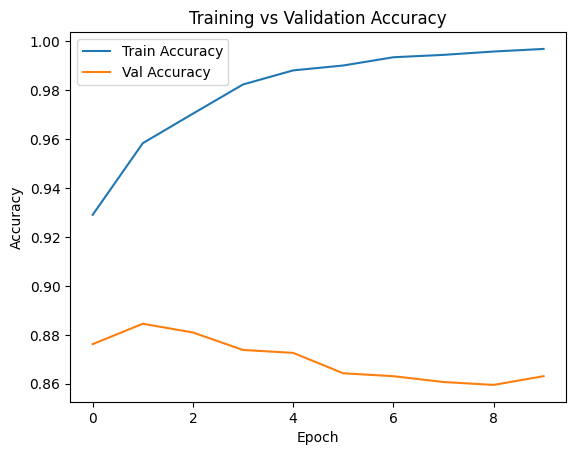

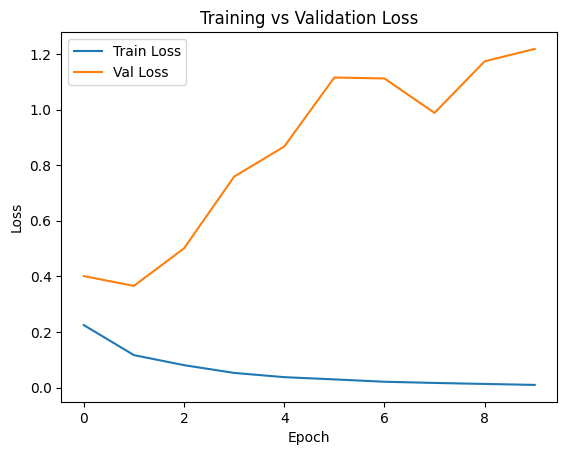

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step

🔍 Validation Metrics:
Accuracy: 0.8630952380952381
Precision: 0.6417910447761194
Recall: 0.3208955223880597
F1 Score: 0.4278606965174129
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
ROC AUC: 0.7595133398164983


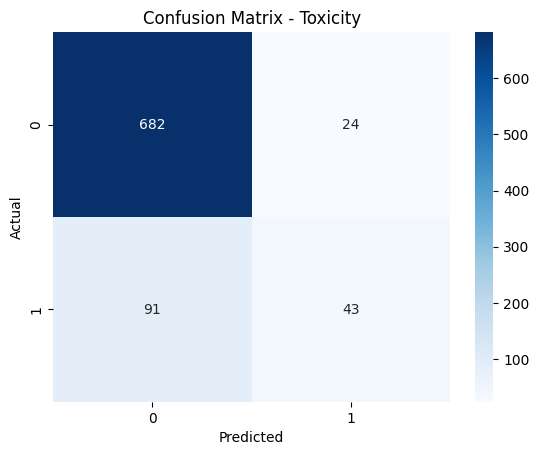

In [46]:
# 📚 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# 🧠 Define labels
sub_labels = ['toxic', 'abusive', 'vulgar', 'menace', 'offense', 'bigotry']

# ✅ Derive final "toxic" label from sub-labels in train and val
df['toxicity'] = (df[sub_labels].sum(axis=1) > 0).astype(int)
# validation['toxic'] = (validation[sub_labels].sum(axis=1) > 0).astype(int)

# 📜 Tokenization setup
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['cleaned_text'])

def sequence_text(text):
    sequences = tokenizer.texts_to_sequences(text)
    return pad_sequences(sequences, maxlen=200)

# 🧼 Prepare data
x_train = sequence_text(df['cleaned_text'])
x_val = sequence_text(validation['cleaned_text'])
x_test = sequence_text(test['cleaned_text'])

y_train = df['toxicity'].values
y_val = validation['toxic'].values

# 🧠 Model
model = Sequential([
    Embedding(10000, 256),
    LSTM(128, return_sequences=True),
    LSTM(64),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Single binary output
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 🚀 Train
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

# 📈 Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# 📊 Predict on validation and test
val_preds = (model.predict(x_val) > 0.5).astype(int).flatten()
test_preds = (model.predict(x_test) > 0.5).astype(int).flatten()

# 🧪 Evaluate
print("\n🔍 Validation Metrics:")
print("Accuracy:", accuracy_score(y_val, val_preds))
print("Precision:", precision_score(y_val, val_preds))
print("Recall:", recall_score(y_val, val_preds))
print("F1 Score:", f1_score(y_val, val_preds))
print("ROC AUC:", roc_auc_score(y_val, model.predict(x_val).flatten()))

# 🔍 Confusion matrix
conf_matrix = confusion_matrix(y_val, val_preds)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Toxicity")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 📦 Save predictions to DataFrame
test['predicted_toxic'] = test_preds
validation['predicted_toxic'] = val_preds

# 💾 Save files
test.to_csv('/kaggle/working/test_toxic_predictions.csv', index=False)
validation.to_csv('/kaggle/working/validation_toxic_predictions.csv', index=False)
